In [29]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [30]:
#load data
raindf=pd.read_csv('/content/drive/MyDrive/ML project files/Rainfall.csv')

In [31]:
#view data
raindf.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [7]:
raindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [32]:
raindf.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [60]:
# Clean column names by stripping whitespace
raindf.columns = raindf.columns.str.strip()

# Now select the columns after cleaning
rainfall_data = raindf[['day', 'pressure', 'winddirection', 'windspeed', 'rainfall']]
print(rainfall_data)

     day  pressure  winddirection  windspeed rainfall
0      1    1025.9           80.0       26.3      yes
1      2    1022.0           50.0       15.3      yes
2      3    1019.7           40.0       14.2      yes
3      4    1018.9           50.0       16.9      yes
4      5    1015.9           40.0       13.7      yes
..   ...       ...            ...        ...      ...
361   27    1022.7           30.0       18.4      yes
362   28    1026.6           20.0       25.9      yes
363   29    1025.9           70.0       33.4      yes
364   30    1025.3           20.0       20.9      yes
365   31    1026.4           20.0       23.3       no

[366 rows x 5 columns]


In [112]:
inp = raindf[['windspeed']]
out = raindf['rainfall']

In [113]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
rainfall_data['rainfall'] = le.fit_transform(rainfall_data['rainfall'])

# To get the mapping
print(le.classes_)

['no' 'yes']


/tmp/ipython-input-2910111459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_data['rainfall'] = le.fit_transform(rainfall_data['rainfall'])


In [114]:
LR.fit(inp1, out1)

LinearRegression()

In [115]:
LinearRegression()

LinearRegression()

In [116]:
# Predict the numerical outcome for a given windspeed (e.g., 5)
# Create a DataFrame with the correct column name for prediction to avoid the UserWarning
windspeed_for_prediction = pd.DataFrame({'windspeed': [5]})
numerical_prediction = LR.predict(windspeed_for_prediction)[0]

# Apply a threshold to convert numerical prediction to 0 or 1
# Assuming 'yes' is 1 and 'no' is 0 based on LabelEncoder's common behavior
binary_prediction = 1 if numerical_prediction >= 0.5 else 0

# Use the LabelEncoder to inverse transform the binary prediction back to 'yes' or 'no'
final_prediction = le.inverse_transform([binary_prediction])[0]

print(f"For a windspeed of 5, the predicted rainfall is: {final_prediction}")

For a windspeed of 5, the predicted rainfall is: yes


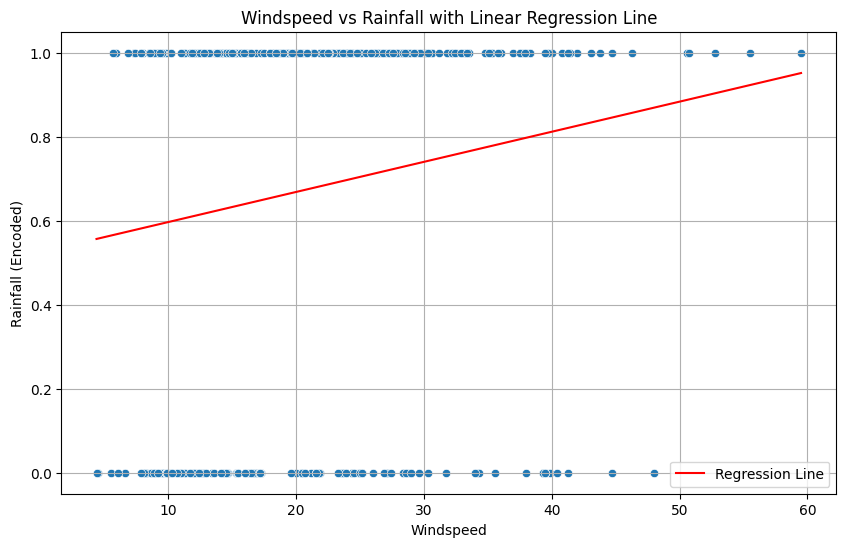

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of windspeed vs rainfall
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='rainfall', data=temp_df)

# Plot the regression line
# Predict rainfall values using the trained linear regression model
windspeed_range = pd.DataFrame({'windspeed': np.linspace(temp_df['windspeed'].min(), temp_df['windspeed'].max(), 100)})
rainfall_predictions = LR.predict(windspeed_range)
sns.lineplot(x=windspeed_range['windspeed'], y=rainfall_predictions, color='red', label='Regression Line')

plt.title('Windspeed vs Rainfall with Linear Regression Line')
plt.xlabel('Windspeed')
plt.ylabel('Rainfall (Encoded)')
plt.grid(True)
plt.legend()
plt.show()